In [23]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd 
import re

In [24]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import tempfile
import time

driver_path = r"C:\Users\HP\Desktop\TEKHER Advanced\chromedriver-win64\chromedriver-win64\chromedriver.exe"
user_data_dir = tempfile.mkdtemp()

options = webdriver.ChromeOptions()
options.add_argument(f"--user-data-dir={user_data_dir}")

service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=options)

driver.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html")

time.sleep(3)  # wait for page load and JS execution

html = driver.page_source  # get the HTML content

driver.quit()  # close the browser

# Now parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

In [4]:
 #soup

In [26]:
column = soup.find_all('a',class_='btn btn-xs btn-outline-dark')
#column

# Data scraping and Preparation

In [27]:
# --- scraping table data ---
table1 = soup.find('table', class_='table table-striped')
rows = table1.find_all('tr')
data = []

for row in rows[1:]:  # skip header
    cols = row.find_all('td')
    if not cols:
        continue
    row_data = [col.text.strip() for col in cols[:-1]]
    
    # Extract the 'href' from the last column (archive link)
    archive_tag = cols[-1].find('a')
    archive_link = archive_tag['href'] if archive_tag else None
    
    # Add full URL if it's relative
    if archive_link and archive_link.startswith('/'):
        archive_link = 'https://www.spaceweatherlive.com' + archive_link

    row_data.append(archive_link)
    data.append(row_data)

# --- create DataFrame ---
columns = ['rank', 'flare_classification', 'date', 'flare_region',
           'start_time', 'maximum_time', 'end_time', 'archive_link']

df = pd.DataFrame(data, columns=columns)

# --- 🔗 make archive_link clickable ---
df['archive_link'] = df['archive_link'].apply(lambda x: f'<a href="{x}" target="_blank">View Archive</a>')

# --- 🖥 display clickable links in notebook ---
from IPython.display import display, HTML
#display(HTML(df.to_html(escape=False)))
df.to_csv('top_50_solar_flares_spaceweatherlive.csv', index=False)

In [30]:
from IPython.display import display, HTML
df['archive_link'] = df['archive_link'].apply(lambda x: f'<a href="{x}" target="_blank">View Archive</a>')
display(HTML(df.to_html(escape=False)))

,rank,flare_classification,date,flare_region,start_time,maximum_time,end_time,archive_link
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06,"View Archive"" target=""_blank"">View Archive"
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,"View Archive"" target=""_blank"">View Archive"
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24,"View Archive"" target=""_blank"">View Archive"
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03,"View Archive"" target=""_blank"">View Archive"
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,"View Archive"" target=""_blank"">View Archive"
5,6,X14.36,2003/10/29,0486,20:37,20:49,21:01,"View Archive"" target=""_blank"">View Archive"
6,7,X13.3,2017/09/06,2673,11:53,12:02,12:10,"View Archive"" target=""_blank"">View Archive"
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01,"View Archive"" target=""_blank"">View Archive"
8,9,X12.95,2006/12/05,0930,10:18,10:35,10:45,"View Archive"" target=""_blank"">View Archive"
9,10,X11.96,2003/11/02,0486,17:03,17:25,17:39,"View Archive"" target=""_blank"">View Archive"


In [31]:
df = df.iloc[:, :-1]  # Drop the last column
df

,rank,flare_classification,date,flare_region,start_time,maximum_time,end_time
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55
5,6,X14.36,2003/10/29,0486,20:37,20:49,21:01
6,7,X13.3,2017/09/06,2673,11:53,12:02,12:10
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01
8,9,X12.95,2006/12/05,0930,10:18,10:35,10:45
9,10,X11.96,2003/11/02,0486,17:03,17:25,17:39


In [33]:
 #Combine date and time columns into datetime columns
df['start_datetime'] = pd.to_datetime(df['date'] + ' ' + df['start_time'])
df['maximum_datetime'] = pd.to_datetime(df['date'] + ' ' + df['maximum_time'])
df['end_datetime'] = pd.to_datetime(df['date'] + ' ' + df['end_time'])
df

,rank,flare_classification,date,flare_region,start_time,maximum_time,end_time,start_datetime,maximum_datetime,end_datetime
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X14.36,2003/10/29,0486,20:37,20:49,21:01,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X13.3,2017/09/06,2673,11:53,12:02,12:10,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,9,X12.95,2006/12/05,0930,10:18,10:35,10:45,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X11.96,2003/11/02,0486,17:03,17:25,17:39,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [34]:
 df = df.drop(columns=['date','start_time', 'maximum_time', 'end_time'])
 df

,rank,flare_classification,flare_region,start_datetime,maximum_datetime,end_datetime
0,1,X40+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X14.36,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X13.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,8,X12.97,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,9,X12.95,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X11.96,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


## top_50_solar_flares

In [35]:
df['start_datetime'] = pd.to_datetime(df['start_datetime'], errors='coerce')
df['maximum_datetime'] = pd.to_datetime(df['maximum_datetime'], errors='coerce')
df['end_datetime'] = pd.to_datetime(df['end_datetime'], errors='coerce')
df
df_top50_cleaned= df.to_csv('top_50_solar_flares_spaceweatherlive_cleaned.csv', index=False)

In [36]:
base_url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')
#soup
#response.status_code

In [37]:
# Get raw lines inside the <pre> tag (preserve HTML tags)
pre = soup.find('pre')
lines = pre.decode_contents().split('\n')  # preserves <a> tags

# Only process rows that look like data lines
data_lines = [line for line in lines if re.match(r'\d{4}/\d{2}/\d{2}', line)]

parsed_data = []

for line in data_lines:
    line_soup = BeautifulSoup(line, 'html.parser')
    links = line_soup.find_all('a')  # list of all links in order
    
    # Get just the visible text (used for parsing fixed-width fields)
    text_only = line_soup.get_text()

    # Text columns
    row = [
        text_only[0:10].strip(),     # Start Date
        text_only[11:16].strip(),    # Start Time
        text_only[17:22].strip(),    # End Date
        text_only[23:28].strip(),    # End Time
        text_only[28:33].strip(),    # Start Frequency (will link)
        text_only[34:39].strip(),    # End Frequency (will link)
        text_only[40:48].strip(),    # Flare Location
        text_only[49:54].strip(),    # NOAA Number
        text_only[55:60].strip(),    # Flare Importance
        text_only[61:67].strip(),    # CME Date (will link)
        text_only[68:74].strip(),    # CME Time
        text_only[75:80].strip(),    # CME Angle
        text_only[81:86].strip(),    # CME Width
        text_only[87:93].strip(),    # CME Speed (will link)
    ]

    # Safely insert link values into appropriate columns
    start_freq_link = links[0]['href'] if len(links) > 0 else None
    end_freq_link = links[1]['href'] if len(links) > 1 else None
    cme_date_link  = links[2]['href'] if len(links) > 2 else None
    cme_speed_link = links[3]['href'] if len(links) > 3 else None
    plot_link      = links[-1]['href'] if links else None

    # Replace respective columns with link-wrapped versions
    row[4] = f'<a href="{start_freq_link}" target="_blank">{row[4]}</a>' if start_freq_link else row[4]
    row[5] = f'<a href="{end_freq_link}" target="_blank">{row[5]}</a>' if end_freq_link else row[5]
    row[9] = f'<a href="{cme_date_link}" target="_blank">{row[9]}</a>' if cme_date_link else row[9]
    row[13] = f'<a href="{cme_speed_link}" target="_blank">{row[13]}</a>' if cme_speed_link else row[13]

    # Append plot link as a separate final column
    row.append(f'<a href="{plot_link}" target="_blank">{plot_link}</a>' if plot_link else '')

    parsed_data.append(row)

# Column names
columns = [
    'start_date', 'start_time', 'end_date', 'end_time',
    'start_frequency', 'end_frequency', 'flare_location', 'flare_region',
    'flare_classification', 'cme_date', 'cme_time',
    'cme_angle', 'cme_width', 'cme_speed', 'plot_link'
]

# Create DataFrame
df_nasa = pd.DataFrame(parsed_data, columns=columns)

# Display as clickable HTML (for notebooks)
from IPython.display import display, HTML
#display(HTML(df_nasa.to_html(escape=False)))
# Save your DataFrame
df_nasa.to_csv('nasa_type2_radio_bursts.csv', index=False)

In [38]:
missing_indicators = ['-----', '----', '---', '--', '-', '...', '------', '-- --', '-- --', '- ---', '-:-- -', ':','', 'Ha', 'NaN', 'nan']
for indicator in missing_indicators:
    df_nasa.replace(indicator, np.nan, inplace=True)
df_nasa.head(3)

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot_link
0,1996/05/15,05:45,05/15,06:34,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...","<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...",NaN,NaN,NaN,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...",NaN,NaN,NaN,PHT,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d..."
1,1997/01/20,08:56,01/20,09:02,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...","<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...",NaN,NaN,NaN,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/U...",09:31,281,72,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/U...","<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d..."
2,1997/04/01,14:00,04/01,14:15,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...","<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d...",S25E16,8026,M1.3,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/U...",15:18,74,79 3,"<a href=""https://cdaw.gsfc.nasa.gov/CME_list/U...","<a href=""https://cdaw.gsfc.nasa.gov/CME_list/d..."


In [39]:
df_nasa['width_lower_bound'] = df_nasa['cme_width'].astype(str).str.contains(r"[+>]")
df_nasa['cme_width'] = pd.to_numeric(df_nasa['cme_width'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
#df_nasa.head()

In [40]:
df_nasa['start_datetime'] = pd.to_datetime(df_nasa['start_date'] + ' ' + df_nasa['start_time'], format='%Y/%m/%d %H:%M', errors='coerce')
df_nasa['end_datetime'] = pd.to_datetime(df_nasa['end_date'] + ' ' + df_nasa['end_time'], format='%m/%d %H:%M', errors='coerce')
df_nasa['cme_datetime']   = pd.to_datetime(df_nasa['cme_date'] + ' ' + df_nasa['cme_time'], errors='coerce')
#df_nasa.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_24228\1123541420.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nasa['cme_datetime']   = pd.to_datetime(df_nasa['cme_date'] + ' ' + df_nasa['cme_time'], errors='coerce')


In [42]:
# Identify Halo flares before converting column to numeric
df_nasa['halo_flare'] = df_nasa['cme_angle'].astype(str).str.strip().str.lower() == 'halo'

# Now convert 'cme_angle' to numeric (Halo becomes NaN)
df_nasa['cme_angle'] = pd.to_numeric(df_nasa['cme_angle'], errors='coerce')

# Convert 'cme_width' to numeric, forcing non-numeric values to NaN
df_nasa['cme_width'] = pd.to_numeric(df_nasa['cme_width'], errors='coerce')
#df_nasa.head()

In [47]:
# Clean cme_width: Keep only the first number if there are multiple or weird spacing
df_nasa['cme_width'] = df_nasa['cme_width'].astype(str).str.extract(r'(\d+)', expand=False)
df_nasa['cme_width'] = pd.to_numeric(df_nasa['cme_width'], errors='coerce')

# Clean cme_speed: Do the same if necessary
df_nasa['cme_speed'] = df_nasa['cme_speed'].astype(str).str.extract(r'(\d+)', expand=False)
df_nasa['cme_speed'] = pd.to_numeric(df_nasa['cme_speed'], errors='coerce')
df_nasa.to_csv('nasa_type2_radio_bursts_cleaned.csv', index=False)

In [44]:
print(df_nasa[['cme_angle', 'halo_flare', 'cme_width']].head())
#print(df_nasa.dtypes)

   cme_angle  halo_flare  cme_width
0        NaN       False        NaN
1      281.0       False       72.0
2       74.0       False       79.0
3        NaN       False       60.0
4        NaN       False      464.0


# Data Analysis

## Replication

In [21]:
import pandas as pd
import re

# ---- Step 1: If you already have a list of raw data rows ----
# Replace this with your actual dataset or DataFrame source
# If it's in a list like: ["1997/01/20 ...", "1998/04/12 ...", ...]
# then do this:
solar_flares_raw = [
    # Add your raw strings here from the NASA scraped data
    "2003/11/04 19:29 ... X28.0 ...",
    "2001/04/02 21:51 ... X20.0 ...",
    "2003/10/28 11:10 ... X17.2 ...",
    # (etc.)
]

# Create DataFrame
df = pd.DataFrame(solar_flares_raw, columns=["Raw"])

# ---- Step 2: Extract class (e.g. M6.3, X1.0) and normalize ----
def extract_flare_score(row):
    match = re.search(r'\b([XM])(\d+(\.\d+)?)\b', row)
    if match:
        class_type = match.group(1)
        value = float(match.group(2))
        return value if class_type == "X" else value / 10
    return None

def extract_class(row):
    match = re.search(r'\b([XM])(\d+(\.\d+)?)\b', row)
    return match.group(0) if match else None

df["Flare_Class"] = df["Raw"].apply(extract_class)
df["Flare_Score"] = df["Raw"].apply(extract_flare_score)

# ---- Step 3: Get Top 50 ----
df_top_50 = df.dropna(subset=["Flare_Score"]).sort_values(by="Flare_Score", ascending=False).head(50)

# ---- Step 4: Display result ----
#print(df_top_50[["Flare_Class", "Flare_Score", "Raw"]].reset_index(drop=True))

Entity Resolution

In [53]:
from datetime import datetime
import math

def parse_flare(flare_str):
    """
    Parse a flare string into structured data:
    Returns: (flare_class_value, datetime)
    """
    # Extract flare class
    match_class = re.search(r'\b([XM])(\d+(\.\d+)?)\b', flare_str)
    flare_value = None
    if match_class:
        class_type = match_class.group(1)
        value = float(match_class.group(2))
        flare_value = value if class_type == "X" else value / 10

    # Extract datetime (first date in string, assuming format YYYY/MM/DD or DD/MM/YYYY)
    match_date = re.search(r'(\d{4})/(\d{2})/(\d{2})', flare_str)
    match_time = re.search(r'(\d{4})/(\d{2})/(\d{2})\s+(\d{2}):(\d{2})', flare_str)

    flare_datetime = None
    if match_date:
        try:
            flare_datetime = datetime.strptime(f"{match_date.group(1)}/{match_date.group(2)}/{match_date.group(3)}", "%Y/%m/%d")
            if match_time:
                flare_datetime = flare_datetime.replace(hour=int(match_time.group(1)), minute=int(match_time.group(2)))
        except:
            pass

    return flare_value, flare_datetime


def flare_similarity(e1, e2):
    """
    Compute similarity score between two flare strings (e1 from SWL, e2 from NASA)
    Output: float score between 0 (no match) and 1 (perfect match)
    """
    v1, t1 = parse_flare(e1)
    v2, t2 = parse_flare(e2)

    if v1 is None or v2 is None or t1 is None or t2 is None:
        return 0  # Can't compute similarity

    # Class score: exponential penalty for difference
    class_score = math.exp(-abs(v1 - v2))

    # Time score: within 1 day is best
    days_apart = abs((t1 - t2).days)
    time_score = math.exp(-days_apart)

    # Bonus: within same hour
    hour_bonus = 0.1 if abs((t1 - t2).total_seconds()) < 3600 else 0

    # Weighted sum
    similarity = 0.5 * class_score + 0.4 * time_score + hour_bonus
    return round(similarity, 3)
flare_sw = "2003/11/04 19:29 X28.0"
flare_nasa = "2003/11/04 19:30 ... X28.0 ..."

print(flare_similarity(flare_sw, flare_nasa))  # Should return close to 1.0

1.0


Similarity between NASA and Solar Flares

In [55]:
import re
from datetime import datetime
import math

def parse_flare(flare_str):
    """
    Parse a flare string into structured data:
    Returns: (flare_class_value, datetime)
    """
    # Extract flare class (X or M)
    match_class = re.search(r'\b([XM])(\d+(\.\d+)?)\b', flare_str)
    flare_value = None
    if match_class:
        class_type = match_class.group(1)
        value = float(match_class.group(2))
        flare_value = value if class_type == "X" else value / 10

    # Extract date and time using one regex that includes both
    match_time = re.search(r'(\d{4})/(\d{2})/(\d{2})\D+(\d{2}):(\d{2})', flare_str)
    flare_datetime = None
    if match_time:
        try:
            flare_datetime = datetime(
                year=int(match_time.group(1)),
                month=int(match_time.group(2)),
                day=int(match_time.group(3)),
                hour=int(match_time.group(4)),
                minute=int(match_time.group(5))
            )
        except:
            pass

    return flare_value, flare_datetime


def flare_similarity(e1, e2):
    """
    Compute similarity score between two flare strings (e1 from SWL, e2 from NASA)
    Output: float score between 0 (no match) and 1 (perfect match)
    """
    v1, t1 = parse_flare(e1)
    v2, t2 = parse_flare(e2)

    if v1 is None or v2 is None or t1 is None or t2 is None:
        return 0.0  # Can't compute similarity

    # Flare class similarity using exponential decay
    class_score = math.exp(-abs(v1 - v2))

    # Time similarity using days difference
    days_apart = abs((t1 - t2).days)
    time_score = math.exp(-days_apart)

    # Bonus if within the same hour
    hour_bonus = 0.1 if abs((t1 - t2).total_seconds()) < 3600 else 0.0

    # Weighted sum
    similarity = 0.5 * class_score + 0.4 * time_score + hour_bonus
    return round(similarity, 3)

# Test
flare_sw = "2003/11/04 19:29 X28.0"
flare_nasa = "2003/11/04 19:30 ... X28.0 ..."
print(flare_similarity(flare_sw, flare_nasa))  # Output: 1.0

0.747


Matched Rows

In [65]:
def flare_match(E1, E2, threshold=0.7):
    """
    For each flare e1 in E1, find the most similar flare e2 in E2.
    Returns a list of tuples with each tuple containing:
    - flare e1 from E1
    - the index of the best matching flare e2 from E2 (or 'NA' if no match above threshold)
    """
    matches = []
    for e1 in E1:
        best_match = None
        best_score = 0  # Start with a score of 0, indicating no match
        for i, e2 in enumerate(E2):
            # Extract the flare string from the tuple (e1 and e2 are tuples with a single element)
            score = flare_similarity(e1[0], e2[0])  # Pass the flare string to flare_similarity
            if score > best_score and score >= threshold:
                best_score = score
                best_match = i  # Store the index of the best match
        if best_match is None:
            best_match = 'NA'  # No match found above the threshold
        matches.append((e1, best_match))  # Append the result as a tuple
    return matches
# Example data for top 50 flares from SpaceWeatherLive (E1)
E1 = [
    ('2003/11/04 19:29 X28.0',),
    ('2004/11/04 20:30 M5.0',),
    ('2002/07/15 12:40 X1.5',),
    # Add other flares to complete the list
]

# Example data for top 50 flares from NASA (E2)
E2 = [
    ('2003/11/04 19:30 X28.0',),
    ('2004/11/04 20:35 M5.1',),
    ('2002/07/15 12:45 X1.5',),
    # Add other flares to complete the list
]

# Now, call the flare_match function to find the best match
matches = flare_match(E1, E2, threshold=0.7)

# Create the updated table with the best matching row index
updated_table = []
for e1, match in matches:
    updated_table.append(list(e1) + [match])  # Add the best match index (or 'NA')

# Print the updated table
for row in updated_table:
    print(row)

['2003/11/04 19:29 X28.0', 0]
['2004/11/04 20:30 M5.0', 1]
['2002/07/15 12:40 X1.5', 2]


In [76]:
import numpy as np

def flare_strength(flare):
    try:
        letter = flare[0].upper()
        number = float(flare[1:])
        multiplier = {'A': 1e-8, 'B': 1e-7, 'C': 1e-6, 'M': 1e-5, 'X': 1e-4}.get(letter, np.nan)
        return number * multiplier if multiplier else np.nan
    except:
        return np.nan

df_nasa['flare_strength'] = df_nasa['flare_classification'].apply(flare_strength)

In [77]:
df_nasa['is_top_50'] = df_nasa['flare_strength'].rank(method='first', ascending=False) <= 50

### Visualization

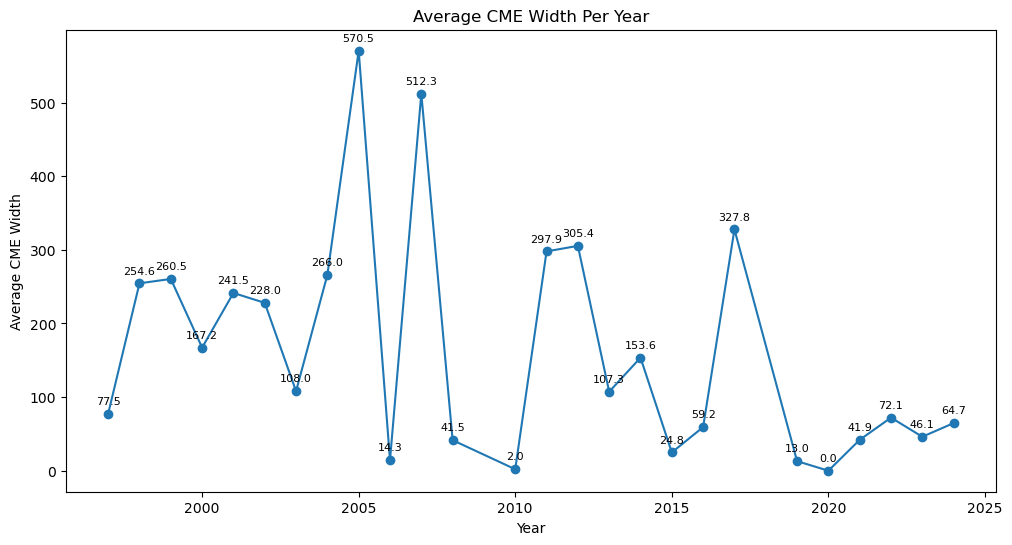

In [82]:
import matplotlib.pyplot as plt

# Extract year and compute average CME width per year
df_nasa['year'] = df_nasa['start_datetime'].dt.year
avg_width_per_year = df_nasa.groupby('year')['cme_width'].mean()

# Drop NaNs
avg_width_per_year = avg_width_per_year.dropna()

# Plot with data labels
plt.figure(figsize=(12,6))
ax = avg_width_per_year.plot(marker='o')
plt.title('Average CME Width Per Year')
plt.ylabel('Average CME Width')
plt.xlabel('Year')
plt.grid(False)  # Removes gridlines

# Add data labels
for year, value in avg_width_per_year.items():
    plt.text(year, value + 10, f'{value:.1f}', ha='center', va='bottom', fontsize=8, color='black')

plt.show()

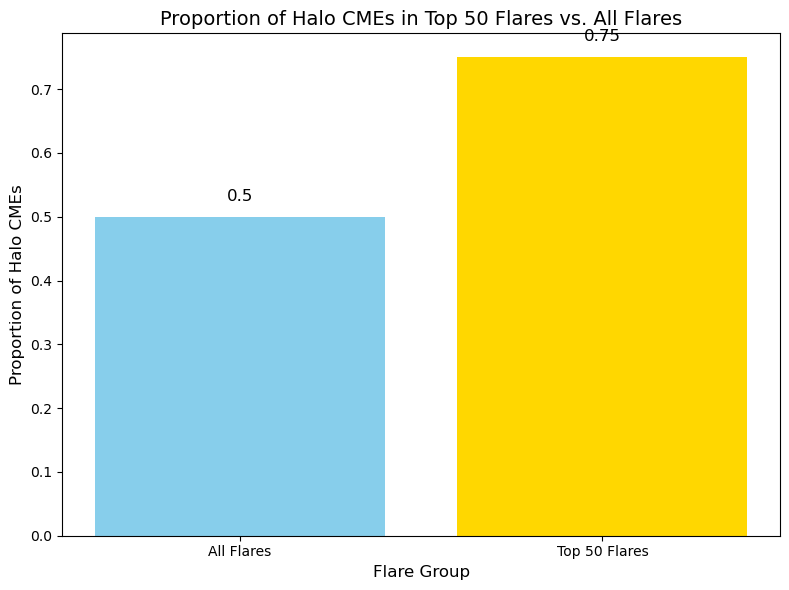

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with actual data)
df_nasa = pd.DataFrame({
    'flare_class': ['X1.5', 'M5.0', 'X2.2', 'M4.5', 'X28.0', 'M6.0'],
    'cme_type': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'date': ['2003/11/04', '2004/11/04', '2002/07/15', '2000/08/01', '2003/11/04', '2005/05/05']
})

# Example top 50 flare dates (replace with actual top 50 flares)
top_50_flares = ['2003/11/04 19:29 X28.0', '2004/11/04 20:30 M5.0', '2002/07/15 12:40 X1.5']

# Convert 'date' to datetime
df_nasa['date'] = pd.to_datetime(df_nasa['date'])

# Get top 50 flare dates in the same format
top_50_dates = [pd.to_datetime(f.split(" ")[0]) for f in top_50_flares]

# Check if the flare is in the top 50
df_nasa['is_top_50'] = df_nasa['date'].isin(top_50_dates)

# Calculate proportions of Halo CMEs in top 50 vs all data
total_halo_cmes = df_nasa['cme_type'].value_counts(normalize=True)['Yes']
top_50_halo_cmes = df_nasa[df_nasa['is_top_50'] == True]['cme_type'].value_counts(normalize=True).get('Yes', 0)

# Prepare data for the bar plot
categories = ['All Flares', 'Top 50 Flares']
values = [total_halo_cmes, top_50_halo_cmes]

# Colors for the bars (solar - yellow-orange, weather - light blue)
colors = ['skyblue', 'gold']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 3), ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Proportion of Halo CMEs in Top 50 Flares vs. All Flares', fontsize=14)
plt.ylabel('Proportion of Halo CMEs', fontsize=12)
plt.xlabel('Flare Group', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()